# Example of Reducing JWST NIRCam observations

JWST calibration pipeline software is currently under active development. It is not yet supported for public use, but it is available publically in a GitHub repository: https://github.com/spacetelescope/jwst. Please see the README there for more information about installation.

# Data 

WFIRST WFI images will share many similar properties to the JWST NIRCam instrument.   

The table below compares the file names that have been used for HST and JWST to the different levels of data for WFIRST.  It also includes the expected size from the DMS Operations Concept for a single exposure or frame.


| Description | HST File Name | JWST File Name  | WFIRST Level 
|-------------|---------------|----------------|-----------------
| Telemetry from Space Craft | Science telemetry | Science telemetry | Level 0 | 
| Uncalibrated Data | raw | uncal | Level 1 | 604 MB
| Rate Image        |  ima   | rate or rateints |   NA   | 
| Calibrated Exposure | flc/flt | cal or calints | Level 2 | 3 GB
| Resample and combined exposure | drz | i2d | Level 3 
| Source Catalog | NA | cat  | Level 4

https://jwst-pipeline.readthedocs.io/en/latest/jwst/data_products/product_types.html


In [38]:
import jwst
from jwst import datamodels


In [2]:
# retrieve the data for notebook
from urllib.request import urlretrieve
urlretrieve('https://data.science.stsci.edu/redirect/WFIRST/Tutorials/jwst_example/jw42424001001_01101_00001_nrcb1_uncal.fits', 
            'jw42424001001_01101_00001_nrcb1_uncal.fits')

('jw42424001001_01101_00001_nrcb1_uncal.fits',
 <http.client.HTTPMessage at 0x7f69cba34090>)

In [39]:
im = datamodels.open('jw42424001001_01101_00001_nrcb1_uncal.fits')

In [40]:
print(im)

<RampModel(1, 4, 2048, 2048) from jw42424001001_01101_00001_nrcb1_uncal.fits>


In [41]:
print(im.info())

filename: jw42424001001_01101_00001_nrcb1_uncal.fits
date: 2020-02-26T02:40:13.519
model_type: RampModel
----------------------------------------------------------------------
attribute                               size                type
----------------------------------------------------------------------
data                                    (2048,2048,4,1)     float32
group                                   4R x 13C            (integration_number:I,group_number:I,end_day:I,end_milliseconds:J,end_submilliseconds:I,group_end_time:26A,number_of_columns:I,number_of_rows:I,number_of_gaps:I,completion_code_number:I,completion_code_text:36A,bary_end_time:D,helio_end_time:D)
zeroframe                               (2048,2048,1)       float32
pixeldq                                 (2048,2048)         uint32
groupdq                                 (2048,2048,4,1)     uint8
err                                     (2048,2048,4,1)     float32



In [42]:
im.meta.instrument.name


'NIRCAM'

(2048, 2048)


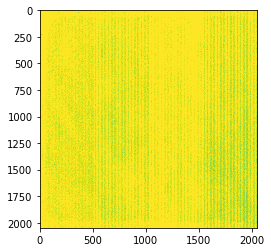

In [43]:
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)

image = im.data[0][3]
print(image.shape)
norm = ImageNormalize(image, vmin=1000, vmax=10000,
                      stretch=SqrtStretch())

plt.imshow(image, norm=norm)


# Stages and Pipelines

The JWST Data Reduction Pipeline (typically referred to as the "calibration pipeline") processes data from all instruments and observing modes, producing both fully calibrated individual exposures and high level data products (mosaics, extracted spectra, etc.). It is organized in stages by type of observations. The algorithms and overall structure of the pipeline are decided by an inclusive working group. The details about how to install and run the calibration pipeline are provided.


In [11]:
from jwst.pipeline import Detector1Pipeline


In [12]:
pipe = Detector1Pipeline()
pipe.save_calibrated_ramp = True


2020-03-04 17:30:48,615 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
INFO:stpipe.Detector1Pipeline:Detector1Pipeline instance created.
2020-03-04 17:30:48,618 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
INFO:stpipe.Detector1Pipeline.group_scale:GroupScaleStep instance created.
2020-03-04 17:30:48,620 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
INFO:stpipe.Detector1Pipeline.dq_init:DQInitStep instance created.
2020-03-04 17:30:48,622 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
INFO:stpipe.Detector1Pipeline.saturation:SaturationStep instance created.
2020-03-04 17:30:48,625 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
INFO:stpipe.Detector1Pipeline.ipc:IPCStep instance created.
2020-03-04 17:30:48,627 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
INFO:stpipe.Detector1Pipeline.superbias:SuperBiasStep instance c

In [13]:
result = pipe.call(im)

2020-03-04 17:30:52,077 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-03-04 17:30:52,086 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dqinitstep'
2020-03-04 17:30:52,091 - CRDS - ERROR -  Error determining best reference for 'pars-saturationstep'  =   Unknown reference type 'pars-saturationstep'
2020-03-04 17:30:52,096 - CRDS - ERROR -  Error determining best reference for 'pars-ipcstep'  =   Unknown reference type 'pars-ipcstep'
2020-03-04 17:30:52,101 - CRDS - ERROR -  Error determining best reference for 'pars-superbiasstep'  =   Unknown reference type 'pars-superbiasstep'
2020-03-04 17:30:52,107 - CRDS - ERROR -  Error determining best reference for 'pars-refpixstep'  =   Unknown reference type 'pars-refpixstep'
2020-03-04 17:30:52,112 - CRDS - ERROR -  Error determining best reference for 'pars-rscd_step'  =   Unknown reference type 'p

This will run all of the following steps as part of this pipeline:

<table class="relative-table wrapped confluenceTable"><colgroup><col style="width: 8.06452%;" /><col style="width: 72.7704%;" /><col style="width: 19.1651%;" /></colgroup><tbody><tr><td class="confluenceTd"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/group_scale/index.html#group-scale-step">Group Scale</a></p></td><td class="confluenceTd"><span style="color: #404040;">The<span>&nbsp;</span></span><code class="xref py py-obj docutils literal notranslate"><span class="pre">group_scale</span></code><span style="color: #404040;"><span>&nbsp;</span>step rescales pixel values in raw JWST science data products to correct for instances where on-board frame averaging did not result in the proper downlinked values.</span></td></tr><tr><td class="confluenceTd"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/dq_init/index.html#dq-init-step">Data Quality (DQ) Initialization</a></p></td><td class="confluenceTd"><p><span style="color: #404040;">The Data Quality (DQ) initialization step in the calibration pipeline populates the DQ mask for the input dataset.&nbsp;</span></p></td></tr><tr><td class="confluenceTd"><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/saturation/index.html#saturation-step">Saturation Flagging</a></td><td class="confluenceTd"><span style="color: #404040;">The<span>&nbsp;</span></span><code class="docutils literal notranslate"><span class="pre">saturation</span></code><span style="color: #404040;"><span>&nbsp;</span>step flags saturated pixel values.</span></td></tr><tr><td class="confluenceTd"><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/ipc/index.html#ipc-correction">Interpixel Capacitance</a></td><td class="confluenceTd"><span style="color: #404040;">The<span>&nbsp;</span></span><code class="docutils literal notranslate"><span class="pre">ipc</span></code><span style="color: #404040;"><span>&nbsp;</span>step corrects a JWST exposure for interpixel capacitance by convolving with an IPC reference image.&nbsp; This step is currently skipped in the JWST pipeline</span></td></tr><tr><td class="confluenceTd" colspan="1"><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/superbias/index.html#superbias-subtraction">Superbias Subtraction</a> &nbsp;</td><td class="confluenceTd" colspan="1"><span style="color: #404040;">The superbias subtraction step removes the fixed detector bias from a science data set by subtracting a superbias reference image.</span></td></tr><tr><td class="confluenceTd" colspan="1"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/refpix/index.html#refpix-step">Reference Pixel Correction</a></p></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">The<span>&nbsp;</span></span><code class="docutils literal notranslate"><span class="pre">refpix</span></code><span style="color: #404040;"><span>&nbsp;</span>step corrects for drifts by using reference pixels.</span></td></tr><tr><td class="confluenceTd" colspan="1"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/linearity/index.html#linearity-step">Linearity Correction</a></p></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">The linearity step applies the &ldquo;classic&rdquo; linearity correction adapted from the HST WFC3/IR linearity correction routine, correcting science data values for detector non-linearity.</span></td></tr><tr><td class="confluenceTd" colspan="1"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/persistence/index.html#persistence-step">Persistence Correction</a></p></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">Based on a model, this step computes the number of traps that are expected to have captured or released a charge during an exposure. The released charge is proportional to the persistence signal, and this will be subtracted (group by group) from the science data.</span></td></tr><tr><td class="confluenceTd" colspan="1"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/dark_current/index.html#dark-current-step">Dark Current Subtraction</a></p></td><td class="confluenceTd" colspan="1"><p>The dark current step removes dark current from a JWST exposure by subtracting dark current data stored in a dark reference file.</p></td></tr><tr><td class="confluenceTd" colspan="1"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/jump/description.html">Jump Detection</a></p></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">This routine detects jumps in an exposure by looking for outliers in the up-the-ramp signal for each pixel in each integration within an input exposure.</span></td></tr><tr><td class="confluenceTd" colspan="1"><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/ramp_fitting/index.html#ramp-fitting-step">Ramp Fitting</a></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">This step determines the mean count rate, in units of counts per second, for each pixel by performing a linear fit to the data in the input file. T</span></td></tr><tr><td class="confluenceTd" colspan="1"><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/gain_scale/index.html#gain-scale-step">Gain Scale Correction</a></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">The<span>&nbsp;</span></span><code class="docutils literal notranslate"><span class="pre">gain_scale</span></code><span style="color: #404040;"><span>&nbsp;</span>step rescales pixel values in JWST countrate science data products in order to correct for the effect of using a non-standard detector gain setting.<span>&nbsp;</span></span></td></tr></tbody></table>


# Steps

Individual steps can also be run instead of the Pipeline as a whole.  To produce the calibrate observation from the rate  image, the `Image2Pipeline` could be run or each of the individual steps could be run on its own:

In [14]:
from jwst.background import background_step 
from jwst.assign_wcs import assign_wcs_step
from jwst.flatfield import flat_field_step
from jwst.photom import photom_step


In [15]:
level2 = assign_wcs_step.AssignWcsStep.call(result)
level2 = flat_field_step.FlatFieldStep.call(level2)
level2 = photom_step.PhotomStep.call(level2)

2020-03-04 17:35:55,205 - CRDS - ERROR -  Error determining best reference for 'pars-assignwcsstep'  =   Unknown reference type 'pars-assignwcsstep'
2020-03-04 17:35:55,207 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
INFO:stpipe.AssignWcsStep:AssignWcsStep instance created.
2020-03-04 17:35:55,298 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep running with args (<ImageModel(2048, 2048) from jw42424001001_01101_00001_nrcb1_uncal.fits>,).
INFO:stpipe.AssignWcsStep:Step AssignWcsStep running with args (<ImageModel(2048, 2048) from jw42424001001_01101_00001_nrcb1_uncal.fits>,).
2020-03-04 17:35:55,300 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_y_low': -0.55, 'slit_y_high': 0.55}
INFO:stpip

The steps for the Stage 2 processing in JWST include the following steps: 

<table class="relative-table wrapped confluenceTable"><colgroup><col style="width: 8.06452%;" /><col style="width: 72.7704%;" /><col style="width: 19.1651%;" /></colgroup><tbody><tr><td class="confluenceTd" colspan="1"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/background/index.html#background-step">Background Image Subtraction</a></p></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">The background subtraction step performs image-from-image subtraction in order to accomplish subtraction of background signal.</span></td><td class="confluenceTd" colspan="1">None</td></tr><tr><td class="confluenceTd" colspan="1"><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/assign_wcs/index.html#assign-wcs-step">Assign WCS</a></td><td class="confluenceTd" colspan="1">The assign WCS step&nbsp;<span style="color: #404040;">&nbsp;associates a WCS object with each science exposure.<span>&nbsp;</span></span></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">The <code>DISTORTION</code> reference file contains a combination of astropy models, representing the transform from detector to the telescope V2, V3 system</span></td></tr><tr><td class="confluenceTd" colspan="1"><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/flatfield/index.html#flatfield-step">Flat-field</a></td><td class="confluenceTd" colspan="1">F<span style="color: #404040;">lat-fields an input science data set by dividing by a flat-field reference image</span></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">The <code>FLAT</code> reference file contains pixel-by-pixel detector response values. It is used for all instrument modes except the NIRSpec spectroscopic modes.</span></td></tr><tr><td class="confluenceTd" colspan="1"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/photom/index.html#photom-step">Photometric Calibration</a></p></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">The<span>&nbsp;</span></span><code class="docutils literal notranslate"><span class="pre">photom</span></code><span style="color: #404040;"><span>&nbsp;</span>step applies flux (photometric) calibrations to a data product to convert the data from units of countrate to surface brightness (or, in some cases described below, to units of flux density).</span></td><td class="confluenceTd" colspan="1"><p>The <code>PHOTOM</code> reference file contains conversion factors for putting pixel values into physical units.</p></td></tr></tbody></table>

(2048, 2048)


  xa[xa < 0] = -1

2020-03-04 20:08:50,992 - stpipe - WARNING - /opt/conda/envs/wfirst-sit/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1

  xa[xa < 0] = -1



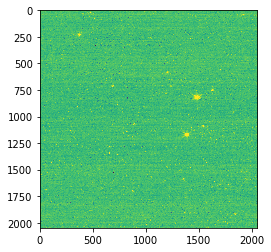

In [44]:
from matplotlib import pyplot as plt
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)

image = level2.data
print(image.shape)
norm = ImageNormalize(image, vmin=-10, vmax=10,
                      stretch=SqrtStretch())

plt.imshow(image, norm=norm)


In [17]:
level2.write('jw42424001001_01101_00003_nrcb1_cal.fits')

In [46]:
print(level2.info())

filename: jw42424001001_01101_00003_nrcb1_cal.fits
date: 2020-03-04T17:35:56.331
model_type: ImageModel
----------------------------------------------------------------------
attribute                               size                type
----------------------------------------------------------------------
data                                    (2048,2048)         float32
dq                                      (2048,2048)         uint32
var_poisson                             (2048,2048)         float32
var_rnoise                              (2048,2048)         float32
err                                     (2048,2048)         float32
var_flat                                (2048,2048)         float32
area                                    (2048,2048)         float32



The processing to produce Level 3 files includes:

<table class="relative-table wrapped confluenceTable"><colgroup><col style="width: 96.0px;" /><col style="width: 757.0px;" /><col style="width: 201.0px;" /></colgroup><tbody><tr><th class="confluenceTh">Step</th><th class="confluenceTh">Description</th><th class="confluenceTh" colspan="1">Reference Files</th></tr><tr><td class="confluenceTd" colspan="1"><p>TweakReg</p></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">This step creates image catalogs of point-like sources whose centroids are then used to compute corrections to the WCS of the input images such that sky catalogs obtained from the image catalogs using the corrected WCS will align on the sky.</span></td><td class="confluenceTd" colspan="1">Parameter Reference files</td></tr><tr><td class="confluenceTd" colspan="1"><p>SkyMatch</p></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">The<span>&nbsp;</span></span><code class="docutils literal notranslate"><span class="pre">skymatch</span></code><span style="color: #404040;"><span>&nbsp;</span>step can be used to compute sky values in a collection of input images that contain both sky and source signal.<span>&nbsp;</span></span></td><td class="confluenceTd" colspan="1">None</td></tr><tr><td class="confluenceTd" colspan="1"><p>Outlier Detection</p></td><td class="confluenceTd" colspan="1"><span style="color: #404040;">Processing multiple datasets together allows for the identification of bad pixels or cosmic-rays that remain in each of the input images, many times at levels which were not detectable by the<span>&nbsp;</span></span><a class="reference internal" style="text-decoration: none;" href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/jump/index.html#jump-step"><span class="std std-ref">jump</span></a><span style="color: #404040;"><span>&nbsp;</span>step.<span>&nbsp;</span></span></td><td class="confluenceTd" colspan="1">None</td></tr><tr><td class="confluenceTd"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/resample/index.html#resample-step">Resampling</a></p></td><td class="confluenceTd"><span style="color: #404040;">This routine will resample each input 2D image based on the WCS and distortion information, and will combine multiple resampled images into a single undistorted product. </span></td><td class="confluenceTd" colspan="1">None</td></tr></tbody></table>

The processing to procude Level 4 files includes:

<table class="relative-table wrapped confluenceTable"><colgroup><col style="width: 8.06452%;" /><col style="width: 72.7704%;" /><col style="width: 19.1651%;" /></colgroup><tbody><tr><td class="confluenceTd"><p><a href="https://jwst-pipeline.readthedocs.io/en/latest/jwst/source_catalog/index.html#source-catalog-step">Source Catalog</a></p></td><td class="confluenceTd"><p>This step creates a catalog of source photometry and morphologies using <a href="https://photutils.readthedocs.io/en/stable/">photutils</a>.</p></td><td class="confluenceTd">None</td></tr></tbody></table>

# Developing New Features

An example of a commonly requested new feature is the ability to inject artificial sources into the image.  This is a toy exampe of how that might be done. 

In [47]:
import astropy

In [48]:
astropy.__version__

'4.0'

In [49]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16, 6)  # make the default figure size larger
matplotlib.rcParams['image.interpolation'] = 'nearest'  # don't blur/smooth image plots
from matplotlib import pyplot as plt
import webbpsf
import webbpsf.wfirst

Simulate a source to inject into the WFIRST detector image

In [50]:
wfi = webbpsf.wfirst.WFI()
xpos = 400
ypos = 400 
wfi.detector_position = (xpos, ypos)


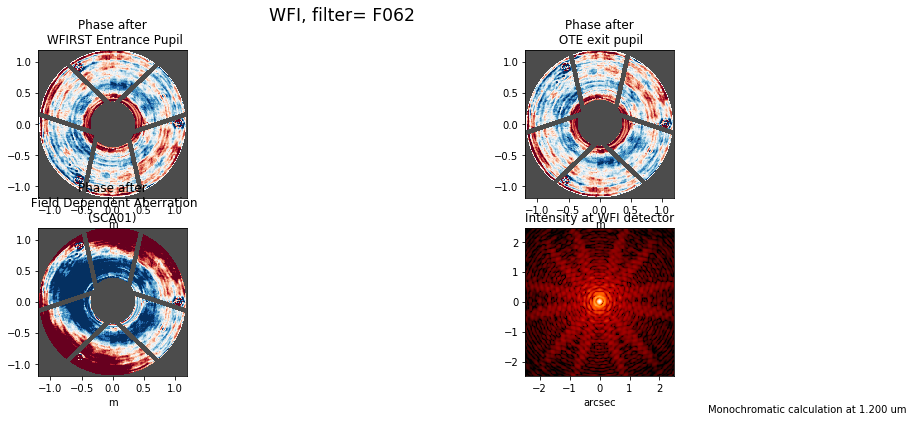

In [51]:
mono_psf = wfi.calc_psf(monochromatic=1.2e-6, display=True)

In [52]:
#level2 = datamodels.open('jw42424001001_01101_00001_nrcb1_cal.fits')

In [53]:
mono_psf[0].data.shape

(180, 180)

In [54]:
mono_psf[0].data.max()

0.03381649868199891

Make a copy of the image.   Scale the injection source and inject it into the image

In [55]:
sim = level2.copy()

In [56]:

factor = 10000
sim.data[400:580,400:580] += factor*mono_psf[0].data

Compare the input image and the image with the default image 

(2048, 2048)


  xa[xa < 0] = -1

2020-03-04 20:12:54,904 - stpipe - WARNING - /opt/conda/envs/wfirst-sit/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1

  xa[xa < 0] = -1



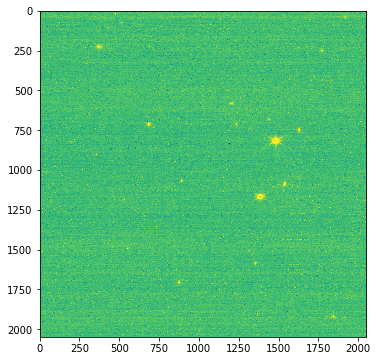

In [57]:
from matplotlib import pyplot as plt
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)

image = level2.data
print(image.shape)
norm = ImageNormalize(image, vmin=-10, vmax=10,
                      stretch=SqrtStretch())

plt.imshow(image, norm=norm)


(2048, 2048)


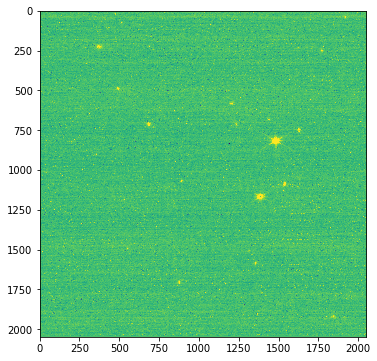

In [58]:
image = sim.data
print(image.shape)
norm = ImageNormalize(image, vmin=-10, vmax=10,
                      stretch=SqrtStretch())

plt.imshow(image, norm=norm)


Run a detection algorithm and see if an injected source is detected. 

In [59]:
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder


In [60]:
mean, median, std = sigma_clipped_stats(level2.data, sigma=3.0)  

In [61]:
daofind = DAOStarFinder(fwhm=3.0, threshold=100.*std)



In [62]:
level2_sources = daofind(level2.data - median)  

In [63]:
sim_sources = daofind(sim.data - median)  

In [64]:
print(len(sim_sources), len(level2_sources))

46 45
